Data Frames - Empresa fíctica Contoso

In [64]:
# Import Pandas library
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [65]:
# Data Frames creation
products_df = pd.read_csv('Contoso - Cadastro Produtos.csv',sep=';')
customers_df = pd.read_csv('Contoso - Clientes.csv',sep=';')
stores_df = pd.read_csv('Contoso - Lojas.csv',sep=';')
promotions_df = pd.read_csv('Contoso - Promocoes.csv',sep=';')
sales_df = pd.read_csv('Contoso - Vendas - 2017.csv',sep=';')

In [66]:
# Data Information - Products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nome do Produto       1690 non-null   object
 1   Descricao do Produto  1690 non-null   object
 2   Fabricante            1690 non-null   object
 3   Nome da Marca         1690 non-null   object
 4   Tipo                  1690 non-null   object
 5   Custo Unitario        1690 non-null   object
 6   Preco Unitario        1690 non-null   object
 7   ID Produto            1690 non-null   int64 
 8   ID Subcategoria       1690 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 119.0+ KB


In [67]:
# Data Information - Clients
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39504 entries, 0 to 39503
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID Cliente          39504 non-null  int64  
 1   Primeiro Nome       39504 non-null  object 
 2   Sobrenome           39504 non-null  object 
 3   E-mail              39504 non-null  object 
 4   Genero              39504 non-null  object 
 5   Numero de Filhos    39504 non-null  int64  
 6   Data de Nascimento  39504 non-null  object 
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.3+ MB


In [68]:
# Data Information - Clients
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Loja                   306 non-null    int64  
 1   Nome da Loja              306 non-null    object 
 2   Quantidade Colaboradores  305 non-null    float64
 3   País                      306 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 9.7+ KB


In [69]:
# Data Information - Clients
promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Promocao          28 non-null     int64  
 1   Nome Promocao        28 non-null     object 
 2   Percentual Desconto  28 non-null     object 
 3   Data Inicio          28 non-null     object 
 4   Data Termino         28 non-null     object 
 5   Unnamed: 5           0 non-null      float64
 6   Unnamed: 6           0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ KB


In [70]:
# Data Information - Clients
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


In [71]:
# Remove Non useful columns in Data Frame Clients
customers_df = customers_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1)

In [72]:
# Use only columns in Data Frame Clients
customers_df = customers_df[['ID Cliente','E-mail']]

In [73]:
# Remove Non useful columns in Data Frame Promotion
promotions_df = promotions_df.drop(['Unnamed: 5','Unnamed: 6'],axis=1)

In [74]:
# Use only columns in Data Frames Products and Stores
products_df = products_df[['ID Produto','Nome do Produto']]
stores_df = stores_df[['ID Loja','Nome da Loja']]

In [75]:
# Merge Data Frames
sales_df = sales_df.merge(products_df,on='ID Produto')
sales_df = sales_df.merge(stores_df,on='ID Loja')
sales_df = sales_df.merge(customers_df,on='ID Cliente')

In [76]:
# Rename one Column
sales_df = sales_df.rename(columns={'E-mail':'E-mail do Cliente'})

Which customer buy more often?

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64

<AxesSubplot:>

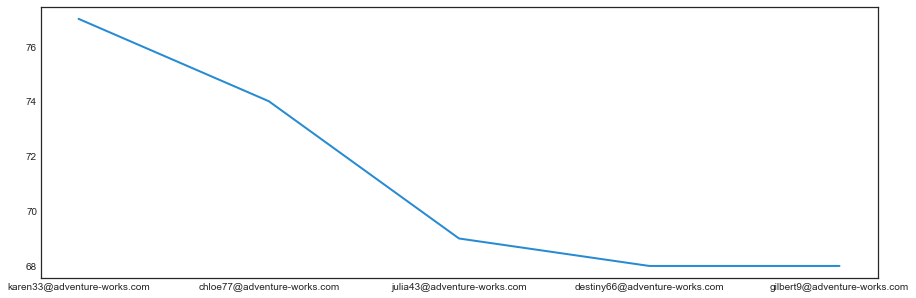

In [77]:
# New data frame, value counts by E-mail and Plot
often_customers = sales_df['E-mail do Cliente'].value_counts()
display(often_customers)
often_customers[:5].plot(figsize=(15,5))


Which store sold the most?

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<AxesSubplot:xlabel='Nome da Loja'>

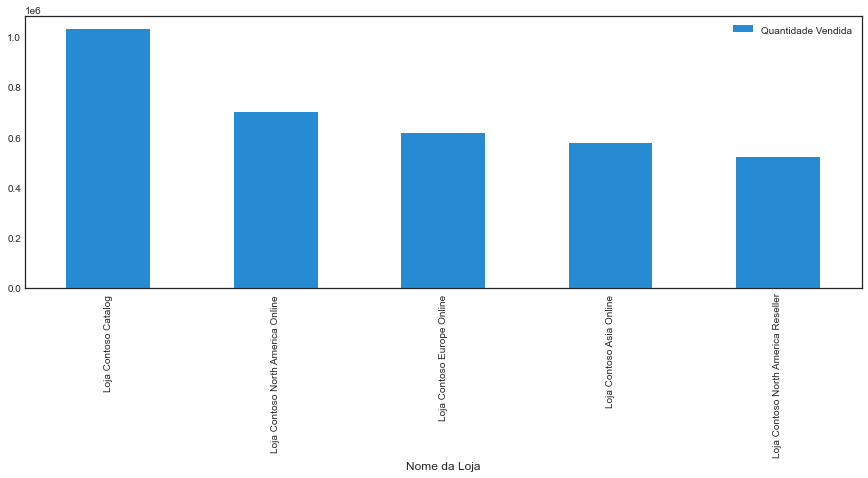

In [90]:
# New data frame Stores, Group By + Sum, Sort Values
sales_stores = sales_df.groupby('Nome da Loja').sum()
sales_stores = sales_stores[['Quantidade Vendida']]
sales_stores = sales_stores.sort_values('Quantidade Vendida',ascending=False)
display(sales_stores)
sales_stores[:5].plot(figsize=(15,5),kind='bar')


In [99]:
# Obtain greater value directly using Max and Index Max
greater_value = sales_stores['Quantidade Vendida'].max()
best_store = sales_stores['Quantidade Vendida'].idxmax()
print(best_store,greater_value)

Loja Contoso Catalog  1029117


Which store lower sold?

In [100]:
# Last list row or item
sales_stores[-1:]

,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


In [101]:
# Obtain lower value directly using Min and Index Min
lower_value = sales_stores['Quantidade Vendida'].min()
worse_store = sales_stores['Quantidade Vendida'].idxmin()
print(worse_store,lower_value)

Loja Contoso Venezia  234


Which % of sales has been returned?

In [105]:
# Sum quantity of sales and returned, calculate the percentage
qty_sales = sales_df['Quantidade Vendida'].sum()
qty_returned = sales_df['Quantidade Devolvida'].sum()
print('{:.2%}'.format(qty_returned / qty_sales))

1.17%


Which % of sales has been returned for Store 'Loja Contoso Europe Online'?

In [108]:
# Filter the Store, Sum quantity of sales and returned, calculate the percentage
sales_store_europe = sales_df[sales_df['ID Loja']== 306]
display(sales_store_europe)
qty_sales = sales_store_europe['Quantidade Vendida'].sum()
qty_returned = sales_store_europe['Quantidade Devolvida'].sum()
print('{:.2%}'.format(qty_returned / qty_sales))

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


1.33%


A table with sales of Store 'Loja Contoso Europe Online' without returned

In [110]:
# Filter the Store without Quantity returned
sales_store_europe_no_returned = sales_df[(sales_df['ID Loja']== 306) & (sales_df['Quantidade Devolvida']== 0)]
display(sales_store_europe_no_returned)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com
